In [ ]:
plt.bar(crime_district.keys(), crime_district.values())
plt.show()

In [ ]:
import random as aleas  # pour generer des nombres aleatoires et +
import matplotlib.pyplot as plt # pour les graphiques
from scipy.signal import freqz   # pour avoir le TF de l'autocorrelation
import numpy as np #pour gerer les moyennes + covariances +++

import csv
import pandas as pd
import datetime

In [ ]:
data = []
title_name = []
cpt = 0
with open('smallcrime.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)

    fieldnames = reader.fieldnames

    for row in reader:
        if(cpt != 0):
            cpt+=1
        else:
            data.append(row)
print(data)


In [ ]:
# How has crime changed over the years?
# Is it possible to predict where or when a crime will be committed?
# Which areas of the city have evolved over this time span?
# In which area most crimes are committed?

TypeError: '<=' not supported between instances of 'dict' and 'dict'

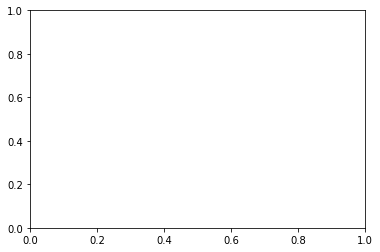

In [75]:
#Analyse temporelle (année, mois)
year2015 = []
year2016 = []
year2017 = []
year2018 = []
years = [year2015,year2016,year2017,year2018]
for c in data:
    if(c["YEAR"] == "2015"):
        year2015.append(c)
    elif(c["YEAR"] == "2016"):
        year2016.append(c)
    elif(c["YEAR"] == "2017"):
        year2017.append(c)
    elif(c["YEAR"] == "2018"):
        year2018.append(c)

#print(year2018)

nb_crime2015 = len(year2015)
nb_crime2016 = len(year2016)
nb_crime2017 = len(year2017)
nb_crime2018 = len(year2018)
nb_crime = [nb_crime2015,nb_crime2016,nb_crime2017,nb_crime2018]

plt.hist(years, nb_crime)

    



{'E18': 116, 'D14': 136, 'B2': 357, 'A1': 242, 'A7': 78, 'C11': 250, 'D4': 266, 'E13': 88, 'B3': 186, 'C6': 169, 'A15': 34, 'E5': 54}


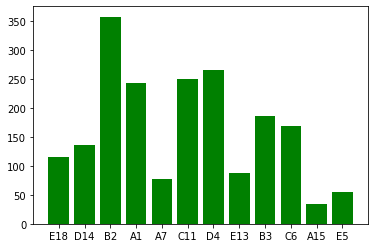

In [74]:
#Analyse par district
crime_district = {}
for c in data:
    if(c["DISTRICT"] != ""):
        if(not c["DISTRICT"] in crime_district):
            crime_district[c["DISTRICT"]] = 0
        crime_district[c["DISTRICT"]] += 1
print(crime_district)

plt.bar(crime_district.keys(), crime_district.values(), color='g')
plt.show()

In [73]:
#Analyse par types (Offense Code group)
crime_type = {}
crime_type_tab = []
for d in data:
    if d["OFFENSE_CODE_GROUP"] in crime_type:
        crime_type[d["OFFENSE_CODE_GROUP"]] += 1
    else:
        crime_type[d["OFFENSE_CODE_GROUP"]] = 1

for key in crime_type.keys():
    
    

print(crime_type)

crime_type_dec = []




IndentationError: expected an indented block (Temp/ipykernel_19160/962253717.py, line 14)

In [ ]:
#Analyse des types en fonction des districts et des années